In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [20]:
# Tải và tiền xử lý dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Thêm một chiều kênh (channel) vào dữ liệu để phù hợp với input của Conv2D
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Chuyển đổi nhãn thành dạng one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
# Xây dựng mô hình
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# In ra cấu trúc mô hình
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 14, 14, 8)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        2336      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 7, 7, 32)         

In [22]:
# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Sử dụng EarlyStopping để dừng sớm nếu val_loss không giảm
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình và lưu lại lịch sử huấn luyện
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Lưu mô hình vào tệp .h5
model.save('cnn_model_mnist.h5')

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6137 - accuracy: 0.7932 - val_loss: 0.1232 - val_accuracy: 0.9660
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3199 - accuracy: 0.8971 - val_loss: 0.0730 - val_accuracy: 0.9778
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2730 - accuracy: 0.9130 - val_loss: 0.0623 - val_accuracy: 0.9812
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2454 - accuracy: 0.9225 - val_loss: 0.0576 - val_accuracy: 0.9821
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2235 - accuracy: 0.9297 - val_loss: 0.0512 - val_accuracy: 0.9840
Epoch 6/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2105 - accuracy: 0.9337 - val_loss: 0.0480 - val_accuracy: 0.9855
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2027 - accuracy: 0.9366 - val_loss: 0.0456 - val_accur

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


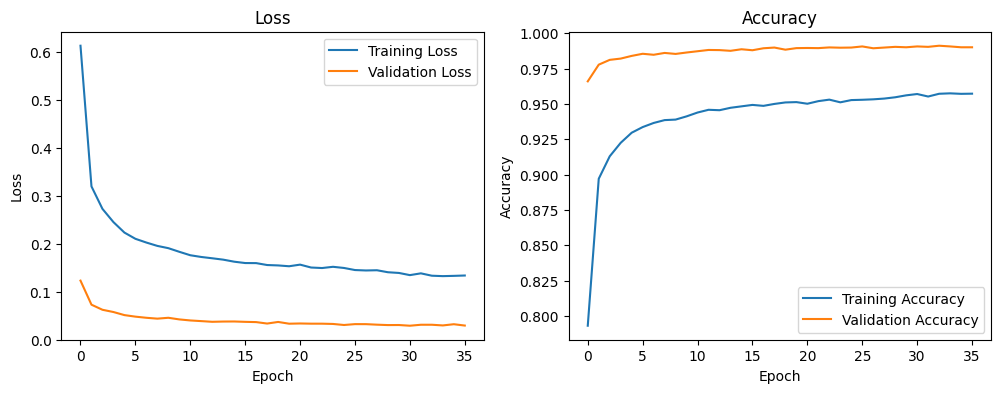

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 977    0    1    0    0    0    1    1    0    0]
 [   0 1130    2    1    0    0    1    1    0    0]
 [   2    1 1023    0    1    0    0    4    1    0]
 [   0    0    3 1002    0    2    0    1    2    0]
 [   0    0    0    0  974    0    0    0    2    6]
 [   2    0    0    6    0  881    1    0    2    0]
 [   5    2    1    0    1    2  946    0    1    0]
 [   0    4    5    0    1    0    0 1017    1    0]
 [   4    0    3    0    0    0    0    0  966    1]
 [   1    1    0    0    6    2    0    3    5  991]]
F1 Score: 0.9906992281846632
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       

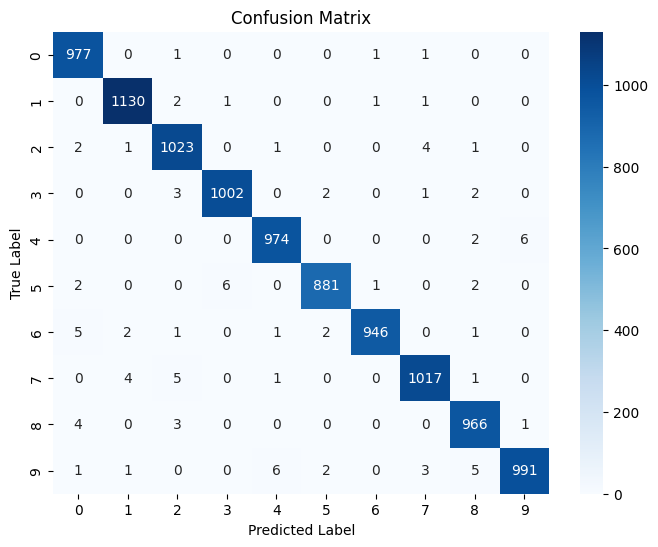

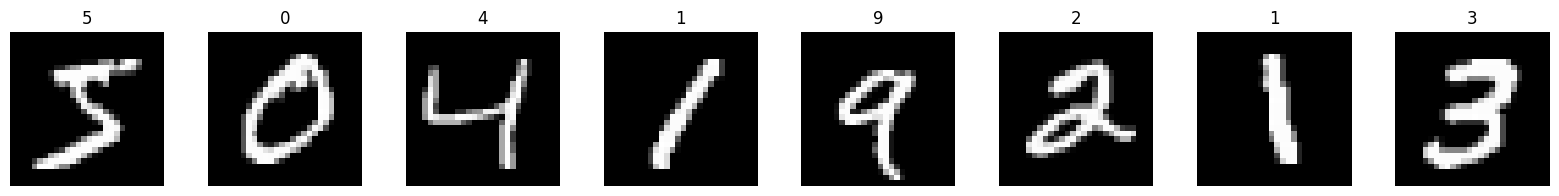

In [23]:
# Vẽ biểu đồ loss và accuracy
def plot_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Biểu đồ Loss
    axs[0].plot(history.history['loss'], label='Training Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Biểu đồ Accuracy
    axs[1].plot(history.history['accuracy'], label='Training Accuracy')
    axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_history(history)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Tính F1 Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")

# In báo cáo phân loại (precision, recall, f1-score cho từng lớp)
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(class_report)

# Vẽ ma trận nhầm lẫn
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Danh sách các lớp trong tập dữ liệu MNIST
class_names = [str(i) for i in range(10)]

# Gọi hàm để vẽ ma trận nhầm lẫn
plot_confusion_matrix(conf_matrix, class_names)

# Hiển thị 8 mẫu ảnh đầu tiên của tập dữ liệu MNIST
def plot_sample_images(x_data, y_data, class_names):
    fig, axes = plt.subplots(1, 8, figsize=(20, 2))
    for i in range(8):
        ax = axes[i]
        ax.imshow(x_data[i].reshape(28, 28), cmap='gray')
        ax.set_title(class_names[y_data[i]])
        ax.axis('off')
    plt.show()

# Lấy 8 mẫu ảnh đầu tiên và nhãn tương ứng
x_samples = x_train[:8]
y_samples = np.argmax(y_train[:8], axis=1)

# Hiển thị 8 mẫu ảnh đầu tiên
plot_sample_images(x_samples, y_samples, class_names)

In [24]:
# Chuyển đổi mô hình sang TFLite với Quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Lưu mô hình TFLite
with open('cnn_model_mnist_quantized.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model quantized and saved as cnn_model_mnist_quantized.tflite")

Model quantized and saved as cnn_model_mnist_quantized.tflite


Original model size: 666.49 KB
Quantized model size: 56.99 KB
313/313 [==============================] - 1s 3ms/step
Inference time (original model): 2.66 seconds
Inference time (quantized model): 0.54 seconds


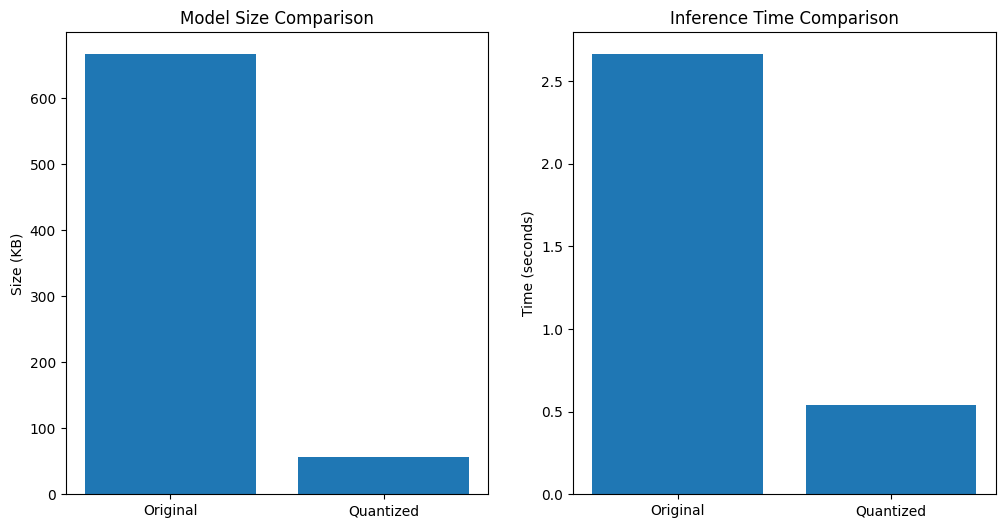

In [26]:
# Trực quan hóa kích thước tệp mô hình trước và sau khi quantization
import os
import time
# Kích thước mô hình trước khi quantization
original_model_size = os.path.getsize('cnn_model_mnist.h5') / 1024
print(f'Original model size: {original_model_size:.2f} KB')

# Kích thước mô hình sau khi quantization
quantized_model_size = os.path.getsize('cnn_model_mnist_quantized.tflite') / 1024
print(f'Quantized model size: {quantized_model_size:.2f} KB')

# Đo tốc độ suy luận của mô hình trước khi quantization
def measure_inference_time(model, x_data):
    start_time = time.time()
    _ = model.predict(x_data)
    end_time = time.time()
    return end_time - start_time

# Tốc độ suy luận trước khi quantization
inference_time_original = measure_inference_time(model, x_test)
print(f'Inference time (original model): {inference_time_original:.2f} seconds')

# Đo tốc độ suy luận của mô hình sau khi quantization
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def measure_tflite_inference_time(interpreter, x_data):
    start_time = time.time()
    for i in range(len(x_data)):
        interpreter.set_tensor(input_details[0]['index'], x_data[i:i+1])
        interpreter.invoke()
        _ = interpreter.get_tensor(output_details[0]['index'])
    end_time = time.time()
    return end_time - start_time

# Tốc độ suy luận sau khi quantization
inference_time_quantized = measure_tflite_inference_time(interpreter, x_test)
print(f'Inference time (quantized model): {inference_time_quantized:.2f} seconds')

# So sánh kích thước tệp và tốc độ suy luận
plt.figure(figsize=(12, 6))

# Kích thước tệp
plt.subplot(1, 2, 1)
plt.bar(['Original', 'Quantized'], [original_model_size, quantized_model_size])
plt.title('Model Size Comparison')
plt.ylabel('Size (KB)')

# Tốc độ suy luận
plt.subplot(1, 2, 2)
plt.bar(['Original', 'Quantized'], [inference_time_original, inference_time_quantized])
plt.title('Inference Time Comparison')
plt.ylabel('Time (seconds)')

plt.show()

In [27]:
# Lưu các tham số weights và biases vào các tệp .txt
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        weights, biases = layer.get_weights()
        layer_name = layer.name

        # Lưu weights
        np.savetxt(f'{layer_name}_weights.txt', weights.flatten(), delimiter=',')

        # Lưu biases
        np.savetxt(f'{layer_name}_biases.txt', biases.flatten(), delimiter=',')

print("Weights and biases saved to .txt files.")

Weights and biases saved to .txt files.
